Useful Definitions:

A. Strict restrictions on cross-border data flows:
 I: Local storage requirement;
 II: Local storage and processing requirement;
 III: Ban on data transfer (i.e. local storage, local processing and local access
 requirement).
 
 
B. Conditional restrictions to cross-border data flows:
 IV: Conditional flow regime where conditions apply to the recipient country;
 V: Conditional flow regime where conditions apply to the data controller or
 data processor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm
import numpy as np
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
# import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('data/regulations_data.csv')

## EDA

In [3]:
df.head()

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Data_Localization,Time,Timeframe,References,References_2,References_3,References_4
0,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Restriction on online sales,E-retail,"Three US States (Alabama, Oklahoma and Utah) p...",NaN,2016.0,Reported in 2016,http://www.ncsl.org/research/financial-service...,NaN,NaN,NaN
1,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Restriction on online sales,E-retail,While it is possible to sell drugs online in t...,NaN,NaN,NaN,http://www.fda.gov/AboutFDA/Transparency/Basic...,http://patients.about.com/od/savemoneyondrugs/...,http://www.cnbc.com/2014/05/23/patients-cross-...,https://www.canadapost.ca/tools/pg/manual/PGcu...
2,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Revised Code of Washington (RCW),E-retail,"Since July 2009, ordering most of tobacco prod...",NaN,2009.0,Since July 2009,http://www.atg.wa.gov/ban-internet-and-mail-or...,NaN,NaN,NaN
3,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Wire Act (1961) \n\nIllegal Gambling Business ...,Online gambling,Overlapping Federal and State regulations proh...,NaN,1961.0,Since 1961,https://www.wto.org/english/tratop_e/dispu_e/c...,https://www.law.cornell.edu/uscode/text/18/1084,http://www.fbi.gov/news/stories/2007/june/gamb...,NaN
4,UNITED STATES,Online sales and transactions,Domain name (DNS) registration requirements,Trading restrictions,usTLD Nexus Requirements Policy,Horizontal,Foreign entities or organizations need a bona ...,NaN,NaN,NaN,http://www.neustar.us/the-ustld-nexus-requirem...,http://www.business-sweden.se/Export/Exportreg...,NaN,NaN


In [4]:
df.shape

(1821, 14)

In [5]:
df.columns

Index(['Country', 'Chapter', 'Subchapter', 'Type', 'Act/Practice', 'Coverage',
       'Description', 'Data_Localization', 'Time', 'Timeframe', 'References',
       'References_2', 'References_3', 'References_4'],
      dtype='object')

In [6]:
df.Country.unique()

array(['UNITED STATES', 'TURKEY', 'SWITZERLAND', 'SOUTH AFRICA', 'RUSSIA',
       'PARAGUAY', 'PANAMA', 'PAKISTAN', 'NORWAY', 'NIGERIA', 'INDIA',
       'ISRAEL', 'ICELAND', 'UNITED KINGDOM', 'SWEDEN', 'SPAIN',
       'SLOVENIA', 'SLOVAKIA', 'ROMANIA', 'PORTUGAL', 'POLAND',
       'NETHERLANDS', 'MALTA', 'LUXEMBOURG', 'LATVIA', 'LITHUANIA',
       'ITALY', 'IRELAND', 'HUNGARY', 'GREECE', 'GERMANY', 'FRANCE',
       'FINLAND', 'ESTONIA', 'DENMARK', 'CZECH REPUBLIC', 'CYPRUS',
       'CROATIA', 'BULGARIA', 'BELGIUM', 'AUSTRIA', 'ECUADOR',
       'COSTA RICA', 'COLOMBIA', 'ARGENTINA', 'THAILAND', 'TAIWAN',
       'SINGAPORE', 'PHILIPPINES', 'NEW ZEALAND', 'MEXICO', 'MALAYSIA',
       'KOREA', 'JAPAN', 'INDONESIA', 'HONG KONG', 'CHILE', 'CANADA',
       'BRUNEI', 'PERU', 'AUSTRALIA', 'VIETNAM', 'CHINA', 'BRAZIL',
       'EUROPEAN UNION', '0'], dtype=object)

In [7]:
len(df.Country.unique())

66

In [15]:
for subchapter in df.Subchapter.dropna().unique():
    print('- ' + subchapter)


- Online sales
- Domain name (DNS) registration requirements
- Export restrictions
- Bandwidth, net neutrality
- Lack of safe harbor for intermediary liability
- Sanctions for non-compliance
- Administrative requirements on data privacy
- Data retention
- Restrictions on cross-border data flows
- Other restrictive practices related to business mobility
- Quotas, Labour Market Tests, Limits of Stay
- Other restrictive practices related to competition policy
- Competition
- Copyright
- Patents
- Screening of investment and acquisitions
- Restrictions on ownership
- Technology mandate
- Preferential purchase schemes covering digital products and services
- Discriminatory tax regime on online services
- Discriminatory tax regime on digital goods and products
- Antidumping, CVD &amp; Safeguards
- Applied tariffs on digital goods
- Barriers to fulfillment
- Product screening and testing requirements
- Product safety certification (EMC/EMI, radio transmission)
- Import restrictions
- Censorsh

In [10]:
df_type_dataFlow = df[(df.Subchapter == 'Restrictions on cross-border data flows')]

In [11]:
df_type_dataFlow.shape

(108, 14)

In [12]:
len(df_type_dataFlow.Country.unique())

46

In [13]:
df_type_dataFlow.head()

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Data_Localization,Time,Timeframe,References,References_2,References_3,References_4
17,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,California Consumer Privacy Act of 2018,Horizontal,While in the United States there is no nationa...,NaN,2018.0,Since 2018,https://oag.ca.gov/system/files/initiatives/pd...,https://oag.ca.gov/system/files/initiatives/pd...,https://www.theverge.com/2018/6/28/17509720/ca...,https://www.caprivacy.org/facts
18,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,NaN,Horizontal,There are few limits on the transfer of person...,NaN,NaN,NaN,http://uk.practicallaw.com/6-502-0467#a57587,NaN,NaN,NaN
19,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,Network Security Agreements,Telecommunication sector,It is reported that foreign communications inf...,NaN,1999.0,Since 1999,https://publicintelligence.net/us-nsas/,https://www.washingtonpost.com/business/techno...,https://info.publicintelligence.net/US-NSAs/US...,NaN
69,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Electronic Communications Act,Electronic communications sector,The transfer of traffic and location data abro...,NaN,2008.0,Since November 2008,http://uk.practicallaw.com/7-520-1896,NaN,NaN,NaN
70,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Data Protection Law No. 6698,Horizontal,The legislation stipulates that data cannot be...,NaN,2016.0,Since April 2016,http://www.mondaq.com/turkey/x/480822/Data+Pro...,http://uk.practicallaw.com/7-520-1896#a350846,http://www.adalet.gov.tr/Tasarilar/kisisel_ver...,NaN


#### Total number of countries with legislation regarding "Restrictions on cross border data flows" in 2019

In [14]:
# Total number of countries represented in this dataset
len(df_type_dataFlow.Country.unique())

46

In [15]:
# Sectors the data transfer laws affect
df_type_dataFlow.Coverage.value_counts()

Horizontal                                                                                                                        52
Public sector                                                                                                                      7
Financial sector                                                                                                                   7
Telecommunication sector                                                                                                           3
Health sector                                                                                                                      3
"Electronic systems operators for public service"                                                                                  3
Gambling sector                                                                                                                    2
Maps services                                                        

In [23]:
# Counrties and total number Restrictions on cross-border data flows laws
out_series = df_type_dataFlow.Country.value_counts()

In [28]:
out_df = pd.DataFrame({'Country': out_series.index, 'n_laws': out_series.values})

In [33]:
# code to binary variable - has or has not 
out_df.n_laws = out_df.n_laws.apply(lambda x: 1 if x>0 else 0)

In [34]:
# %load ../helpers.py
import datetime
import json

def dated_filename (fn, ext='.csv'):
    today = datetime.date.today()
    return '{}-{}{}'.format(fn, today, ext)

def load_json (fn):
    with open(fn, 'r') as myfile:
        data=myfile.read()
    return json.loads(data)


In [35]:
out_df.to_csv(dated_filename('analysis/restrictions-on-cross-border-data-flows'))

## EDA in pre Snowden

Total number of countries with legislation regarding "Restrictions on cross border data flows" pre Snowden (2013)

In [16]:
df_type_dataFlow_Snowden = df_type_dataFlow[df_type_dataFlow.Time < 2013]

In [17]:
len(df_type_dataFlow_Snowden.Country.unique())

33

In [18]:
df_type_dataFlow_Snowden.Coverage.value_counts()

Horizontal                                                               28
Public sector                                                             5
Financial sector                                                          4
Telecommunication sector                                                  2
"Electronic systems operators for public service"                         2
Mainland China                                                            1
Health sector                                                             1
Gambing sector                                                            1
"Online service providers"                                                1
Advertising services                                                      1
Telecommunication services and cloud services                             1
Dropbox, Google Apps, Microsoft's Office 365 and other cloud services     1
Gambling sector                                                           1
Electronic c

In [19]:
df_type_dataFlow_Snowden.Country.value_counts()

CANADA            5
CHINA             4
BELGIUM           3
INDONESIA         3
DENMARK           3
AUSTRALIA         2
NEW ZEALAND       2
INDIA             2
TAIWAN            2
FINLAND           1
BULGARIA          1
KOREA             1
RUSSIA            1
GREECE            1
PORTUGAL          1
ROMANIA           1
COLOMBIA          1
SPAIN             1
NIGERIA           1
LUXEMBOURG        1
MEXICO            1
POLAND            1
ITALY             1
SWEDEN            1
TURKEY            1
SLOVENIA          1
PAKISTAN          1
UNITED STATES     1
NETHERLANDS       1
GERMANY           1
VIETNAM           1
PERU              1
UNITED KINGDOM    1
Name: Country, dtype: int64

In [20]:
# The number of data specific restriction laws

pre_Snowden_total_data_laws = len(df_type_dataFlow_Snowden.Data_Localization)
pre_Snowden_total_data_laws

50

In [21]:
# The number of data localization laws
pre_Snowden_total_data_localization_laws = df_type_dataFlow_Snowden.Data_Localization.value_counts()[0]
pre_Snowden_total_data_localization_laws

7

In [22]:
#Unique countries with data localization laws
df_type_dataFlow_Snowden[df_type_dataFlow_Snowden['Data_Localization']== 'Yes']['Country'].unique()

array(['INDIA', 'INDONESIA', 'CANADA', 'AUSTRALIA', 'CHINA'], dtype=object)

## EDA in post Snowden

In [23]:
df_type_dataFlow_post_Snowden = df_type_dataFlow[df_type_dataFlow.Time >= 2013]

In [24]:
len(df_type_dataFlow_post_Snowden.Country.unique())

27

In [25]:
df_type_dataFlow_post_Snowden.Coverage.value_counts()

Horizontal                                                                                                                        23
Cloud services, public sector data                                                                                                 2
Financial sector                                                                                                                   2
Health sector                                                                                                                      2
Maps services                                                                                                                      2
"Electronic systems operators for public service"                                                                                  1
Financial services                                                                                                                 1
Public sector                                                        

In [26]:
df_type_dataFlow_post_Snowden.Country.value_counts()

CHINA             6
RUSSIA            5
INDIA             4
KOREA             4
GERMANY           4
BRAZIL            3
VIETNAM           3
ARGENTINA         2
INDONESIA         2
TURKEY            2
JAPAN             2
SINGAPORE         2
COLOMBIA          1
MALAYSIA          1
FRANCE            1
ROMANIA           1
ISRAEL            1
NIGERIA           1
SOUTH AFRICA      1
BRUNEI            1
TAIWAN            1
UNITED STATES     1
THAILAND          1
PHILIPPINES       1
EUROPEAN UNION    1
CHILE             1
UNITED KINGDOM    1
Name: Country, dtype: int64

In [27]:
# The number of data specific restriction laws

post_Snowden_total_data_laws = len(df_type_dataFlow_post_Snowden.Data_Localization )
print(post_Snowden_total_data_laws)

54


In [28]:
# The number of data localization laws

post_Snowden_total_data_localization_laws = df_type_dataFlow_post_Snowden.Data_Localization.value_counts()[0]
post_Snowden_total_data_localization_laws

21

In [29]:
#Unique countries with data localization laws
df_type_dataFlow_post_Snowden[df_type_dataFlow_post_Snowden['Data_Localization']== 'Yes']['Country'].unique()

array(['TURKEY', 'RUSSIA', 'INDIA', 'KOREA', 'JAPAN', 'INDONESIA',
       'BRUNEI', 'VIETNAM', 'CHINA'], dtype=object)

________

### Insight 1: Looking at what percent data localization specific laws were of all data related laws for pre and post Snowden

In [30]:
pre_Snowden_data_law_percent =  (pre_Snowden_total_data_localization_laws/ pre_Snowden_total_data_laws) 
pre_Snowden_data_law_percent

0.14

In [31]:
post_Snowden_data_law_percent =  (post_Snowden_total_data_localization_laws/ post_Snowden_total_data_laws) 
post_Snowden_data_law_percent

0.3888888888888889

In [32]:
percent_Change = ((post_Snowden_data_law_percent - pre_Snowden_data_law_percent)/pre_Snowden_data_law_percent) * 100
percent_Change

177.77777777777774

There is a 178% increase in percentage of data localization specific laws from pre snowden to post snowden era.

### Insight 2: Time trend (Average Rate of Increase from 1990 - 2019) ** Work in progress

In [59]:
time = df_type_dataFlow.Time.value_counts().rename_axis('Year').reset_index(name='Count')
time.drop(time.index[28], inplace =True)
time.Year = time.Year.astype(int)
full_timeList = list(range(1972, 2020))

for i in full_timeList:
    if i in list(time['Year']):
        continue
    else:
        time = time.append({'Year': i, 'Count':0}, ignore_index= True)
        
        
time.sort_values(by='Year', inplace=True)
time.reset_index(inplace = True)
time.drop('index', axis=1, inplace = True)
time.reset_index(inplace = True)
time['index'] += 1

In [60]:
df_type_dataFlow

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Data_Localization,Time,Timeframe,References,References_2,References_3,References_4
17,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,California Consumer Privacy Act of 2018,Horizontal,While in the United States there is no nationa...,NaN,2018.0,Since 2018,https://oag.ca.gov/system/files/initiatives/pd...,https://oag.ca.gov/system/files/initiatives/pd...,https://www.theverge.com/2018/6/28/17509720/ca...,https://www.caprivacy.org/facts
18,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,NaN,Horizontal,There are few limits on the transfer of person...,NaN,NaN,NaN,http://uk.practicallaw.com/6-502-0467#a57587,NaN,NaN,NaN
19,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,Network Security Agreements,Telecommunication sector,It is reported that foreign communications inf...,NaN,1999.0,Since 1999,https://publicintelligence.net/us-nsas/,https://www.washingtonpost.com/business/techno...,https://info.publicintelligence.net/US-NSAs/US...,NaN
69,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Electronic Communications Act,Electronic communications sector,The transfer of traffic and location data abro...,NaN,2008.0,Since November 2008,http://uk.practicallaw.com/7-520-1896,NaN,NaN,NaN
70,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Data Protection Law No. 6698,Horizontal,The legislation stipulates that data cannot be...,NaN,2016.0,Since April 2016,http://www.mondaq.com/turkey/x/480822/Data+Pro...,http://uk.practicallaw.com/7-520-1896#a350846,http://www.adalet.gov.tr/Tasarilar/kisisel_ver...,NaN
71,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Payment Services and Electronic Money Institut...,E-money institutions and payment services prov...,"Article 23 of Law No. 6493 requires that ""the ...",Yes,2015.0,Amended in March 2015,http://www.tcmb.gov.tr/wps/wcm/connect/3deb806...,http://www.ey.com/GL/en/Services/Tax/Internati...,http://judiciary.house.gov/_cache/files/cf15ee...,NaN
134,SOUTH AFRICA,Data policies,Restrictions on cross-border data flows,Restrictions on data,Protection of Personal Information Act 4 of 2013,Horizontal,Consent is needed for the data transfer to thi...,NaN,2014.0,Since April 2014,http://www.lorenz-law.com/wp-content/uploads/S...,NaN,NaN,NaN
190,RUSSIA,Data policies,Restrictions on cross-border data flows,Restrictions on data,Federal Law no. 152-FZ “On Personal Data” (OPD...,Horizontal,According to the Federal Law no. 152-FZ “On Pe...,NaN,2007.0,Since January 2007,http://us.practicallaw.com/2-502-2227#a445355,http://www.coe.int/en/web/conventions/full-lis...,NaN,NaN
191,RUSSIA,Data policies,Restrictions on cross-border data flows,Restrictions on data,Federal Law No. 374 on Amending the Federal La...,"Telecommunication sector, ISPs and message exc...","Federal Law No 374-FZ, signed in July 2016, re...",Yes,2018.0,Since July 2016\n\nSince July 2018,http://www.loc.gov/law/foreign-news/article/ru...,https://www.lexology.com/library/detail.aspx?g...,NaN,NaN


In [36]:
x = time["Year"][1:, np.newaxis]
Y = time["Count"][1:, np.newaxis]

# plt.scatter(x, Y, s=10)
# # sort the values of x before line plot
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
# x, y_poly_pred = zip(*sorted_zip)
# plt.plot(x, y_poly_pred, color='m')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('Total number Restrictions on cross-border data flows laws per year')
# plt.show()

In [62]:
df_DL_Yes = df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']

In [64]:
time_DL = df_DL_Yes.Time.value_counts().rename_axis('Year').reset_index(name='Count')
# time_DL.drop(time_DL.index[28], inplace =True)
time_DL.Year = time_DL.Year.astype(int)
full_timeList = list(range(1972, 2020))

for i in full_timeList:
    if i in list(time_DL['Year']):
        continue
    else:
        time_DL = time_DL.append({'Year': i, 'Count':0}, ignore_index= True)
        
        
time_DL.sort_values(by='Year', inplace=True)
time_DL.reset_index(inplace = True)
time_DL.drop('index', axis=1, inplace = True)
time_DL.reset_index(inplace = True)
time_DL['index'] += 1

In [66]:
time_DL = time_DL[28:]

In [75]:
time_DL

,index,Year,Count
28,29,2000,1
29,30,2001,0
30,31,2002,0
31,32,2003,0
32,33,2004,1
33,34,2005,0
34,35,2006,1
35,36,2007,0
36,37,2008,0
37,38,2009,0


In [78]:
pctChange = time_DL.Count.pct_change(fill_method = 'ffill')

pctChange

28         NaN
29   -1.000000
30         NaN
31         NaN
32         inf
33   -1.000000
34         inf
35   -1.000000
36         NaN
37         NaN
38         NaN
39         NaN
40         inf
41   -0.500000
42    0.500000
43    0.333333
44    0.000000
45   -0.500000
46    1.000000
47   -0.500000
Name: Count, dtype: float64

### Insight 3: Number of Countries with explicit data localization/storage requirements in their data legislation

In [80]:
df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']['Country'].unique()

array(['TURKEY', 'RUSSIA', 'INDIA', 'KOREA', 'JAPAN', 'INDONESIA',
       'CANADA', 'BRUNEI', 'AUSTRALIA', 'VIETNAM', 'CHINA'], dtype=object)

In [37]:
number_countries_w_DL = len(df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']['Country'].unique())
print('Number of countries with data localization/storage requirements in their laws: ', number_countries_w_DL)

Number of countries with data localization/storage requirements in their laws:  11


In [79]:
print('Percentage of countries with DL/Storage laws:  ', int((number_countries_w_DL/195) *100), '%')

Percentage of countries with DL/Storage laws:   5 %


### Insight 4: Data Localization/Soveriegnty law frequency per year

In [39]:
df_DL_Yes = df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']
df_DL_Yes['Time']= df_DL_Yes['Time'].astype(int)

C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Data Localization Laws passed per Year')

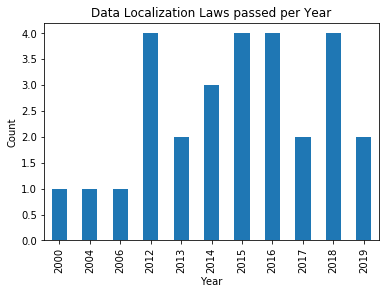

In [40]:
df_DL_Yes_count = df_DL_Yes.groupby('Time').count()['Data_Localization']
df_DL_Yes_count.plot('bar')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Data Localization Laws passed per Year')

### Insight 5: Sector specific trends

In [42]:
df_DL_Yes = df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']

In [43]:
df_DL_Yes.head()

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Data_Localization,Time,Timeframe,References,References_2,References_3,References_4
72,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Payment Services and Electronic Money Institut...,E-money institutions and payment services prov...,"Article 23 of Law No. 6493 requires that ""the ...",Yes,2015.0,Amended in March 2015,http://www.tcmb.gov.tr/wps/wcm/connect/3deb806...,http://www.ey.com/GL/en/Services/Tax/Internati...,http://judiciary.house.gov/_cache/files/cf15ee...,NaN
191,RUSSIA,Data policies,Restrictions on cross-border data flows,Restrictions on data,Federal Law No. 374 on Amending the Federal La...,"Telecommunication sector, ISPs and message exc...","Federal Law No 374-FZ, signed in July 2016, re...",Yes,2018.0,Since July 2016\n\nSince July 2018,http://www.loc.gov/law/foreign-news/article/ru...,https://www.lexology.com/library/detail.aspx?g...,NaN,NaN
192,RUSSIA,Data policies,Restrictions on cross-border data flows,Restrictions on data,Government Decree №758 of 31 July 2014 and №80...,ISPs providing public Wi-Fi,The Russian Government has given instructions ...,Yes,2014.0,Since August 2014,http://www.themoscowtimes.com/news/article/rus...,https://globalvoicesonline.org/2014/08/07/publ...,http://cyberlaw.stanford.edu/page/wilmap-russi...,NaN
193,RUSSIA,Data policies,Restrictions on cross-border data flows,Restrictions on data,New provisions in the Federal law on informati...,"""Organizers of information distribution in the...",The “Blogger’s law” was repealed in in July 2...,Yes,2017.0,From January 2015 until July 2017.,http://www.internetjurisdiction.net/observator...,https://www.hrw.org/news/2017/08/01/russia-new...,NaN,NaN
195,RUSSIA,Data policies,Restrictions on cross-border data flows,Restrictions on data,Federal Law no. 152-FZ “On Personal Data” (OPD...,Horizontal,Russian data protection has been covered since...,Yes,2015.0,Since September 2015,http://www.linklaters.com/Insights/Publication...,http://privacylaw.proskauer.com/2015/08/articl...,http://us.practicallaw.com/2-502-2227#a445355,"Anupam Chander et Uyên P. Lê, 2015, Data Natio..."


In [44]:
df_DL_Yes.Coverage.unique()

array(['E-money institutions and payment services providers',
       'Telecommunication sector, ISPs and message exchange services',
       'ISPs providing public Wi-Fi',
       '"Organizers of information distribution in the Internet"',
       'Horizontal', 'Payment firms', 'Cloud computing',
       'Cloud services, public sector data', 'Maps services',
       'Internet Services',
       '"Electronic systems operators for public service"',
       'Public sector', 'Health sector',
       'Systems critical to national security',
       'Foreign "telecom services" and "internet services"',
       'Online social networks, general information websites, mobile telecoms network based content services and online games services',
       'Telecommunication services and cloud services',
       'Onine taxi companies', 'Taxi sector'], dtype=object)

In [45]:
df_DL_Yes["Coverage_Bin"]= df_DL_Yes["Coverage"].replace(['Payment firms', 'E-money institutions and payment services providers'], "Financial")
df_DL_Yes["Coverage_Bin_1"]= df_DL_Yes["Coverage_Bin"].replace(['Telecommunication sector, ISPs and message exchange services'], "Telecommunications")
df_DL_Yes["Coverage_Bin_2"]= df_DL_Yes["Coverage_Bin_1"].replace(['ISPs providing public Wi-Fi',  'Internet Services','"Electronic systems operators for public service"', 'ISPs providing public Wi-Fi','Foreign "telecom services" and "internet services"' ], "ISPs")
df_DL_Yes["Coverage_Bin_3"]= df_DL_Yes["Coverage_Bin_2"].replace(['"Organizers of information distribution in the Internet"', 'Online social networks, general information websites, mobile telecoms network based content services and online games services'], "Social Networks")
df_DL_Yes["Coverage_Bin_4"]= df_DL_Yes["Coverage_Bin_3"].replace(['Cloud computing', 'Cloud services, public sector data' , 'Telecommunication services and cloud services'], "Cloud Services")
df_DL_Yes["Coverage_Bin_final"]= df_DL_Yes["Coverage_Bin_4"].replace(['Onine taxi companies', 'Taxi sector'], "Taxi")


C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [46]:
df_DL_Yes.Coverage_Bin_final.unique()

array(['Financial', 'Telecommunications', 'ISPs', 'Social Networks',
       'Horizontal', 'Cloud Services', 'Maps services', 'Public sector',
       'Health sector', 'Systems critical to national security', 'Taxi'],
      dtype=object)

Text(0.5, 1.0, 'Number of Data Localization Laws in Different Sectors')

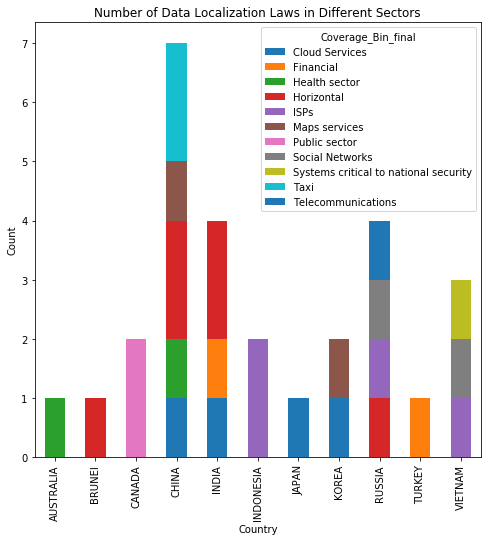

In [47]:
df_plot = df_DL_Yes.groupby(['Coverage_Bin_final', 'Country']).size().reset_index().pivot(columns='Coverage_Bin_final', index='Country', values=0)
df_plot.plot(kind='bar',figsize=(8,8), stacked=True)
plt.ylabel('Count')
plt.title('Number of Data Localization Laws in Different Sectors')

### Next Steps:
- Rank countries by their data localization requirements. If the law is horizontal, sector specific, provides conditions.
- Explore for data on pending legislation regarding data localization/soveriegnty 

___

## Test Code


In [48]:
time.head()

,index,Year,Count
0,1,1972,1
1,2,1973,0
2,3,1974,0
3,4,1975,0
4,5,1976,0


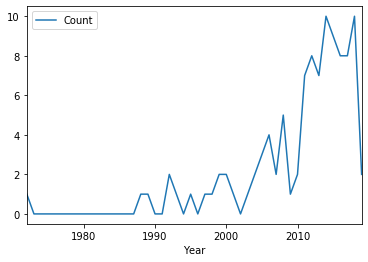

In [49]:
time_plot = time.plot.line(x = 'Year', y = 'Count')

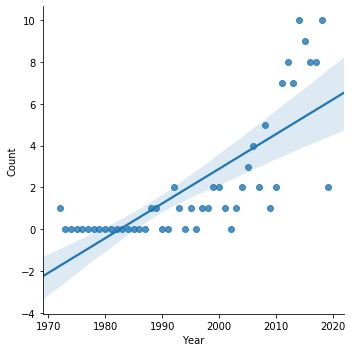

In [50]:
time_plot_v2 = sns.lmplot(x='Year',y='Count',data=time,fit_reg=True)

In [51]:
# transforming the data to include another axis
x = time["Year"][18:, np.newaxis]
Y = time["Count"][18:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(x)

slope, intercept = np.polyfit(np.log(length), np.log(time), 1)
print(slope)
plt.loglog(length, time, '--')
plt.show()

plt.scatter(x, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


NameError: name 'length' is not defined

In [ ]:
degree = 3

df_poly = pd.DataFrame(columns=['y', 'x'])
df_poly['x'] = x
df_poly['y'] = y

weights = np.polyfit(X, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(X)', data=df_poly).fit()
results.summary()